In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("cleaned_house_sale.csv")

X = data[["area", "colB", "colC", "house_age", "zone_rating"]]
y = data["price_usd"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # สัดส่วนข้อมูลที่ใช้เป็น test set
    random_state=42,      # กำหนด seed ให้แบ่งข้อมูลเหมือนเดิมทุกครั้ง
    shuffle=True          # สุ่มข้อมูลก่อนแบ่ง
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit + normalize เฉพาะ train
X_test_scaled = scaler.transform(X_test)         # normalize test ด้วย scaler เดิม

model = Lasso(
    alpha=0.1,            # ค่าความแรงของ L1 penalty (ยิ่งมาก → ตัด feature มาก)
    fit_intercept=True,   # ให้โมเดลเรียนค่า intercept (β0)
    max_iter=10000,       # จำนวนรอบสูงสุดในการ optimize
    tol=0.0001,           # ค่าความคลาดเคลื่อนที่ยอมรับได้ในการหยุด iteration
    selection="cyclic",   # วิธีเลือก feature ในการ optimize (วนทีละตัว)
    random_state=42       # ควบคุมความสุ่ม (มีผลเมื่อ selection เป็น random)
)

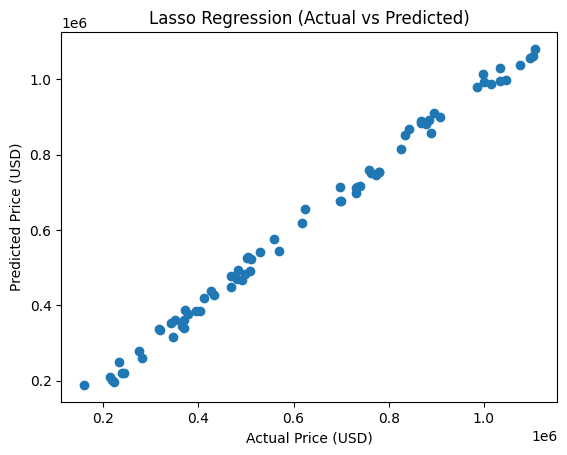

In [5]:
model.fit(X_train_scaled, y_train)

y_pred_test = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Lasso Regression (Actual vs Predicted)")
plt.show()

In [6]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Model: Lasso Regression")
print(f"MSE  : {mse:.2e}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R^2  : {r2:.4f}")

Model: Lasso Regression
MSE  : 4.42e+08
RMSE : 21035.53
MAE  : 18309.33
R^2  : 0.9940
